Filtered 10000 sequences based on GC content.
K-mer count matrix shape: (10000, 1024)


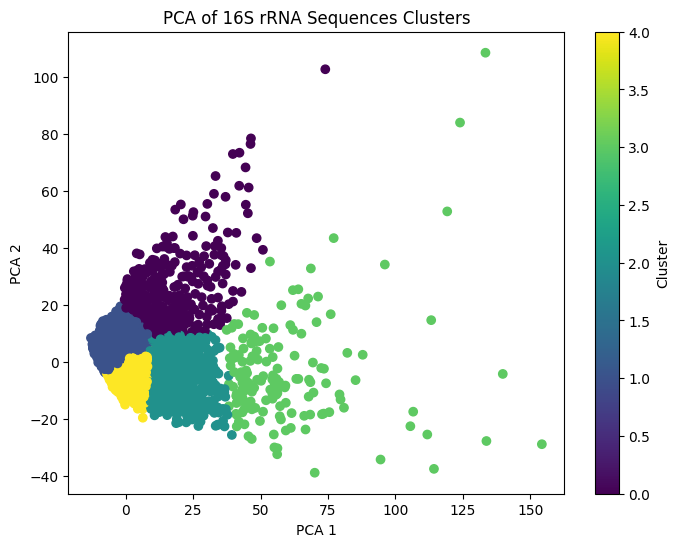

Number of samples: 10000, Max k: 4


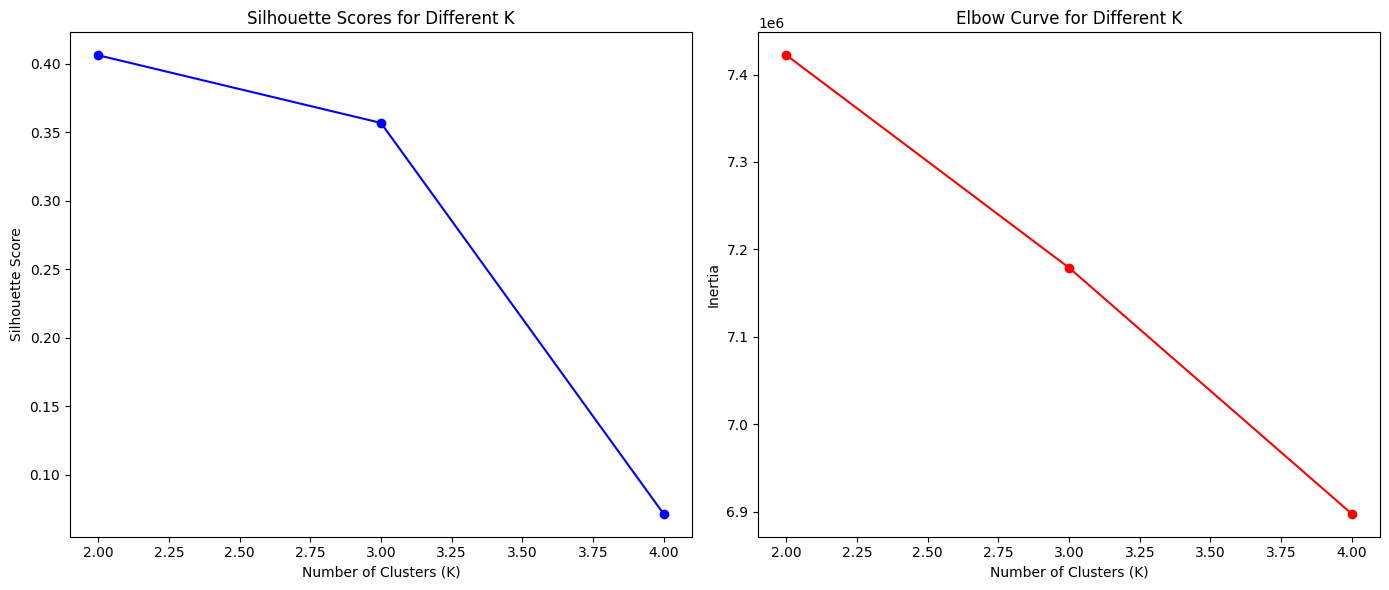

Homogeneity Score: 0.0002
Fowlkes-Mallows Index: 0.3449
Pairwise consistency between runs (higher is better):
[[1.000e+00 5.120e-02 4.867e-01 1.356e-01 1.510e-01 8.390e-02 0.000e+00
  2.600e-03 9.480e-02 6.800e-03]
 [5.120e-02 1.000e+00 1.256e-01 0.000e+00 3.000e-04 3.047e-01 4.980e-02
  0.000e+00 3.750e-02 1.272e-01]
 [4.867e-01 1.256e-01 1.000e+00 5.000e-04 2.000e-04 1.440e-02 1.028e-01
  2.987e-01 4.100e-03 2.400e-02]
 [1.356e-01 0.000e+00 5.000e-04 1.000e+00 4.758e-01 4.931e-01 3.200e-03
  5.130e-02 7.595e-01 2.599e-01]
 [1.510e-01 3.000e-04 2.000e-04 4.758e-01 1.000e+00 2.110e-02 4.758e-01
  5.293e-01 2.731e-01 2.935e-01]
 [8.390e-02 3.047e-01 1.440e-02 4.931e-01 2.110e-02 1.000e+00 1.230e-02
  1.500e-03 6.649e-01 2.000e-04]
 [0.000e+00 4.980e-02 1.028e-01 3.200e-03 4.758e-01 1.230e-02 1.000e+00
  6.587e-01 1.020e-02 1.800e-03]
 [2.600e-03 0.000e+00 2.987e-01 5.130e-02 5.293e-01 1.500e-03 6.587e-01
  1.000e+00 1.140e-02 2.430e-02]
 [9.480e-02 3.750e-02 4.100e-03 7.595e-01 2.731e-0

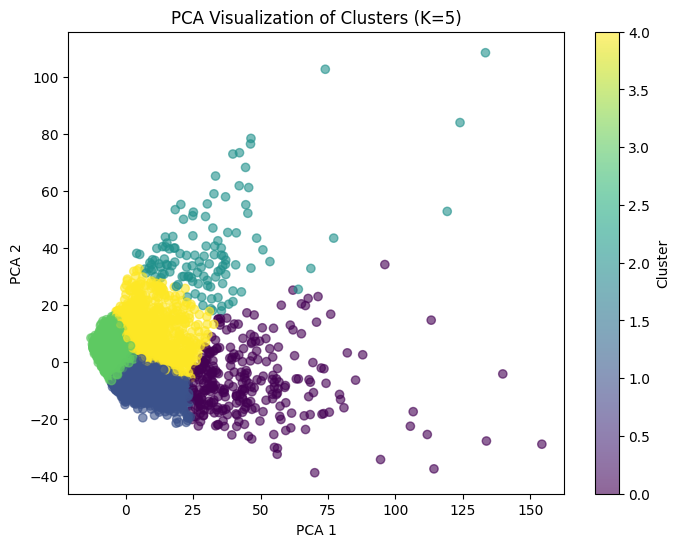

In [1]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators import H2OKMeansEstimator
import pandas as pd
import numpy as np

# Assuming the previous notebook is called 'Clustering_Analysis.ipynb'
%run "C:/Users/m1lfslay3r6000/Music/ESS_569_Project/notebooks/Clustering_Analysis.ipynb"


In [6]:
# Initialize the H2O cluster
h2o.init()

# Assuming the kmer_matrix_dense data is already in memory
# Convert the numpy array to H2OFrame
data = h2o.H2OFrame(kmer_matrix_dense)
# Print summary of the H2OFrame to inspect the columns
data.describe()


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,18 mins 47 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_m1lfslay3r6000_rnmjfp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.193 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:10000
Cols:1024

C1                  C2                  C3                  C4                  C5                  C6                  C7                  C8                  C9                  C10                 C11                 C12                  C13                 C14                 C15                 C16                 C17                 C18                  C19                 C20                  C21                  C22                  C23                  C24                 C25                 C26                 C27                 C28                 C29                  C30                  C31                 C32                 C33                 C34                 C35                 C36                 C37                 C38                 C39                 C40                 C41                 C42                 C43                 C44                 C45                 C46                 C47                 C48                 C49                  C50                  C51                  C52                  C53                 C54                 C55                  C56                  C57                 C58                  C59                 C60                 C61                  C62                 C63                  C64                  C65                 C66                 C67                 C68                 C69                 C70                 C71                 C72                 C73                 C74                 C75                 C76                 C77                  C78                 C79                 C80                 C81                 C82                 C83                 C84                 C85                  C86                 C87                 C88                 C89                 C90                 C91                 C92                  C93                 C94                 C95                 C96                  C97                 C98                 C99                 C100                C101                 C102                C103                C104                C105                C106                C107                 C108                C109                 C110                 C111                C112                C113                 C114                 C115                C116                 C117                 C118                C119                C120                C121                C122                C123                C124                C125                 C126                C127                C128                 C129                C130               C131                C132                C133                 C134                C135                C136                 C137                C138                C139                C140                C141                C142                C143                C144                C145                C146                C147                C148                C149                C150                C151                C152                 C153                C154                C155                C156                 C157                C158                C159                C160                C161                C162                C163                C164                C165                C166                C167               C168                C169                 C170                C171                C172                 C173                 C174                C175               C176                 C177                C178                 C179                C180                C181                C182                 C183                C184                C185                 C186                C187                C188                 C189                 C190                C191                C192                 C193                C194                 C195                C196                C197                 C198           

In [3]:

# Set up H2O AutoML for clustering (note: AutoML in H2O is typically used for supervised tasks)
# For clustering, we will manually tune KMeans using H2OGridSearch

# Define the parameter grid for KMeans clustering
hyper_params = {
    'k': [2, 3, 4, 5, 6, 7],  # Number of clusters
    'init': ['Furthest', 'Random'],  # Initialization method
    'max_iterations': [100, 300, 500],
    'seed': [42]
}

# Initialize H2OKMeansEstimator (H2O's KMeans implementation)
kmeans = H2OKMeansEstimator(keep_cross_validation_predictions=True)
kmeans.train(training_frame=data)
kmeans.cross_validation_holdout_predictions()

kmeans Model Build progress: |███████████████████████████████████████████████████| (done) 100%


In [4]:
# Best model according to Grid Search
best_model = kmeans.model_performance()
print(f"Best Model: {best_model}")


# You can also visualize the clustering results if needed
# Visualizing clustering using PCA or other techniques might require transforming the results

Best Model: ModelMetricsClustering: kmeans
** Reported on train data. **

Total Within Cluster Sum of Square Error: 10238975.997462219
Total Sum of Square Error to Grand Mean: 10238975.997462219
Between Cluster Sum of Square Error: 0.0

Centroid Statistics: 
    centroid    size    within_cluster_sum_of_squares
--  ----------  ------  -------------------------------
    1           10000   1.0239e+07


In [ ]:
target = 'species_A'
data['target'] = target

# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,29 mins 10 secs
H2O_cluster_timezone:,America/Los_Angeles
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,27 days
H2O_cluster_name:,H2O_from_python_m1lfslay3r6000_rnmjfp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.173 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:10000
Cols:1024

C1                  C2                  C3                  C4                  C5                  C6                  C7                  C8                  C9                  C10                 C11                 C12                  C13                 C14                 C15                 C16                 C17                 C18                  C19                 C20                  C21                  C22                  C23                  C24                 C25                 C26                 C27                 C28                 C29                  C30                  C31                 C32                 C33                 C34                 C35                 C36                 C37                 C38                 C39                 C40                 C41                 C42                 C43                 C44                 C45                 C46                 C47                 C48                 C49                  C50                  C51                  C52                  C53                 C54                 C55                  C56                  C57                 C58                  C59                 C60                 C61                  C62                 C63                  C64                  C65                 C66                 C67                 C68                 C69                 C70                 C71                 C72                 C73                 C74                 C75                 C76                 C77                  C78                 C79                 C80                 C81                 C82                 C83                 C84                 C85                  C86                 C87                 C88                 C89                 C90                 C91                 C92                  C93                 C94                 C95                 C96                  C97                 C98                 C99                 C100                C101                 C102                C103                C104                C105                C106                C107                 C108                C109                 C110                 C111                C112                C113                 C114                 C115                C116                 C117                 C118                C119                C120                C121                C122                C123                C124                C125                 C126                C127                C128                 C129                C130               C131                C132                C133                 C134                C135                C136                 C137                C138                C139                C140                C141                C142                C143                C144                C145                C146                C147                C148                C149                C150                C151                C152                 C153                C154                C155                C156                 C157                C158                C159                C160                C161                C162                C163                C164                C165                C166                C167               C168                C169                 C170                C171                C172                 C173                 C174                C175               C176                 C177                C178                 C179                C180                C181                C182                 C183                C184                C185                 C186                C187                C188                 C189                 C190                C191                C192                 C193                C194                 C195                C196                C197                 C198           

In [ ]:
# Define the categories for the target column (e.g., "mutated", "non-mutated")
categories = ['mutated', 'non-mutated']

# Generate 10,000 random labels for the target column
bacteria_species = np.random.choice(categories, size=10000)

data = h2o.H2OFrame(kmer_matrix_dense)
pandas_df = data.as_data_frame()
# Add the target column to the DataFrame
pandas_df['bacteria_species'] = bacteria_species
# Convert the pandas DataFrame to H2OFrame
h2o_df = h2o.H2OFrame(pandas_df)
# Define the features (all columns except the target)
features = h2o_df.columns[:-1]  # Excluding the target column
target = 'bacteria_species'

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


c:\Users\m1lfslay3r6000\AppData\Local\Programs\Python\Python312\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Run H2O AutoML (e.g., for 10 minutes)
aml = H2OAutoML(max_runtime_secs=600, seed=42)  # max_runtime_secs specifies how long to run AutoML
aml.train(x=features, y=target, training_frame=h2o_df)

AutoML progress: |█
00:43:31.793: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_1_20241130_04331_model_15


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    30                 30                          14328                  6            6            6             12            57            33.2333

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.20259873967809747
RMSE: 0.4501096973828685
LogLoss: 0.5955983780853087
Mean Per-Class Error: 0.1967809255705121
AUC: 0.8984952806342618
AUCPR: 0.8972631601078036
Gini: 0.7969905612685235

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.48484659638342104
             mutated    non-mutated    Error    Rate
-----------  ---------  -------------  -------  ---------------
mutated      2587       984            0.2756   (984.0/3571.0)
non-mutated  403        3012           0.118    (403.0/3415.0)
Total        2990       3996           0.1985   (1387.0/6986.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.484847     0.812846  206
max f2                       0.453314     0.882038  241
max f0point5                 0.513335     0.821711  171
max accuracy                 0.500494     0.814629  187
max precision                0.842319     1         0
max recall                   0.334539     1         330
max specificity              0.842319     1         0
max absolute_mcc             0.499467     0.629051  188
max min_per_class_accuracy   0.498265     0.812097  189
max mean_per_class_accuracy  0.499467     0.814502  188
max tns                      0.842319     3571      0
max fns                      0.842319     3414      0
max fps                      0.118751     3571      399
max tps                      0.334539     3415      330
max tnr                      0.842319     1         0
max fnr                      0.842319     0.999707  0
max fpr                      0.118751     1         399
max tpr                      0.334539     1         330

Gains/Lift Table: Avg response rate: 48.88 %, avg score: 49.00 %
group    cumulative_data_fraction    lower_threshold    lift        cumulative_lift    response_rate    score     cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ----------  -----------------  ---------------  --------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.01002                     0.718868           2.04568     2.04568            1                0.761342  1                           0.761342            0.0204978       0.0204978                  104.568   104.568            0.0204978
2        0.0200401                   0.679792           2.04568     2.04568            1                0.695701  1                           0.728522            0.0204978       0.0409956                  104.568   104.568            0.0409956
3        0.0300601                   0.654675           2.04568     2.04568            1                0.66592   1                           0.707655            0.0204978       0.0614934                  104.568   104.568            0.0614934
4        0.0400802                   0.637976           2.04568     2.04568            1                0.646197  1                           0.69229             0.0204978       0.0819912                  104.568   104.568            0.0819912
5        0.0501002      